In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors

In [2]:
def load_ice1(variable_name,experiment_name1):
    mfile1='../sea_ice/model/model_%s_%s_2.csv'%(variable_name,experiment_name1)
    model1=pd.read_csv(mfile1,skipinitialspace=True,header=0)['model']
    file1='../sea_ice/sea_ice/%s_%s_2.csv'%(variable_name,experiment_name1)
    f1=pd.read_csv(file1,skipinitialspace=True,header=0)
    ave=np.zeros((len(model1),12))
    for i,m in enumerate(model1):
        ave[i]=f1[m]
    Ave=np.average(ave,axis=0)
    return model1,f1,Ave

In [5]:
def hs_diff(m1,f1,m2,f2):
    nhdiff={}
    M=[]
    for m in list(m1):
        if m in list(m2):
            M.append(m)
            nhdiff[m]=[]
            for i in range(12):    
                n=f1[m][i]-f2[m][i]
                nhdiff[m].append(n)
    ave=np.zeros((len(M),12))
    for i,m in enumerate(M):
        ave[i]=np.array(nhdiff[m])
    Ave=np.average(ave,axis=0)
    nhdiff['average']=Ave
    #pd.DataFrame(nhdiff).to_csv('../sea_ice/sea_ice_csv/sea_ice/%s.csv'%fm)
    return M,nhdiff,Ave




In [6]:
m_nh_mh,nhmh,nhmhave=load_ice1('sic_nh_area_climo','midHolocene-cal-adj')
m_nh_mhpi,nhmhpi,nhmhpiave=load_ice1('sic_nh_area_climo','piControl')
m_nhmh,nhmhdiff,diffave=hs_diff(m_nh_mh,nhmh,m_nh_mhpi,nhmhpi)

In [7]:
NOAA_n=[13.7,14.6,14.7,13.9,12.4,10.4,7.7,5.6,5.1,7.1,9.9,12.1]
month=[1,2,3,4,5,6,7,8,9,10,11,12]

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

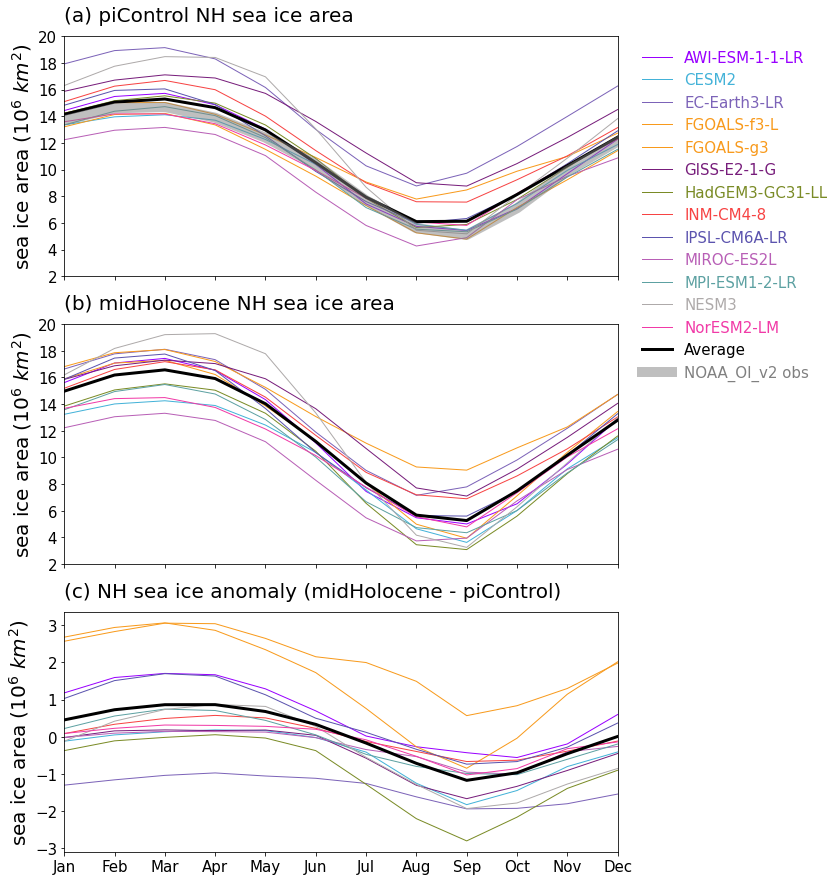

In [8]:
def information(p,expt):
    f = pd.read_csv('ml/%s_%s_modellist.csv'%(p,expt),skipinitialspace=True,header=0)
    m = f['model']
    r = f['ipcc_r']
    g = f['ipcc_g']
    b = f['ipcc_b']
    return m,r,g,b


def subplotting1(title,data,modellist): 
    month = [1,2,3,4,5,6,7,8,9,10,11,12]
    model,r,g,b = information('PMIP4','midHolocene')
    plt.title(title,fontsize=20,loc='left',pad=15)
    plt.xlim([1,12])
    for i,m in enumerate(model):
        if m in modellist:
            plt.plot(month,data[m],color=[r[i],g[i],b[i]],lw=1,label=m)
    yylabel='sea ice area ($10^{6}$ ${km^2}$)'
    plt.ylabel(yylabel,fontsize=20)
    
month=[1,2,3,4,5,6,7,8,9,10,11,12]
month1=['','','','','','','','','','','','']
month2=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# plotting
plt.figure(figsize=(12,15))
gs = gridspec.GridSpec(3,2,height_ratios=[1,1,1],width_ratios=[10,1])
plt.subplot(gs[0])
subplotting1('(a) piControl NH sea ice area',nhmhpi,m_nhmh)
plt.plot(month,nhmhpiave,color='k',lw=3,label='Average')
plt.ylim([2,20])
plt.xticks(month,month1,fontsize=15)
plt.yticks(fontsize=15)
plt.plot(month,NOAA_n,color='grey',alpha=0.5,lw=10,label='NOAA_OI_v2 obs')
leg=plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',edgecolor='None',facecolor='None', borderaxespad=0.5,fontsize=15)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


plt.subplot(gs[2])
subplotting1('(b) midHolocene NH sea ice area',nhmh,m_nhmh)
plt.ylim([2,20])
plt.plot(month,nhmhave,color='k',lw=3,label='Average')
plt.xticks(month,month1,fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(gs[4])
subplotting1('(c) NH sea ice anomaly (midHolocene - piControl)',nhmhdiff,m_nhmh)
plt.xticks(month,month2,fontsize=15)
plt.plot(month,diffave,color='k',lw=3,label='Average')
plt.yticks(fontsize=15)
#xxlabel='Month' 
#plt.xlabel(xxlabel,fontsize=15)


